In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#read csv file
df = pd.read_csv('2013-2023_12_Month_Big10.csv', header = 0)

#view information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   unitid                                                  1564 non-null   int64  
 1   institution name                                        1564 non-null   object 
 2   year                                                    1564 non-null   int64  
 3   Level and degree/certificate-seeking status of student  1564 non-null   object 
 4   Grand total                                             1564 non-null   int64  
 5   American Indian or Alaska Native total                  1564 non-null   int64  
 6   Asian total                                             1564 non-null   int64  
 7   Black or African American total                         1564 non-null   int64  
 8   Hispanic or Latino total              

In [11]:
#view sample of data
df.head(2)

,unitid,institution name,year,Level and degree/certificate-seeking status of student,Grand total,American Indian or Alaska Native total,Asian total,Black or African American total,Hispanic or Latino total,Native Hawaiian or Other Pacific Islander total,White total,Two or more races total,Race/ethnicity unknown total,U.S. Nonresident total,IDX_E12
0,145637,University of Illinois Urbana-Champaign,2023,All students total,62417,31,11085,3245,6570,32.0,23147,1793.0,2810,13704,-2
1,145637,University of Illinois Urbana-Champaign,2023,"All students, Undergraduate total",36970,14,7987,2136,4874,12.0,14096,1302.0,872,5677,-2


In [12]:
#filter to keep rows with "All students total" (remove UGRAD/GRAD subtotals)
df_filter = df[df['Level and degree/certificate-seeking status of student'] == 'All students total']

#add new column totaling 'underrepresented minority enrollments' (American Indian/Alaska Native, Black/African American, Native Hawaiian/Pacific Islander). Note that "Asian" is not included in the definition of URM
df_filter['UME'] = df_filter[['American Indian or Alaska Native total', 'Black or African American total', 'Native Hawaiian or Other Pacific Islander total']].sum(axis=1)

#add new column and calculate UME as percent of total enrollment
df_filter['UME_Percent_Total'] = ((df_filter['UME']/df_filter['Grand total'])*100).round(2)

#check filters
df_filter.head(2)

<ipython-input-12-750d46f299fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['UME'] = df_filter[['American Indian or Alaska Native total', 'Black or African American total', 'Native Hawaiian or Other Pacific Islander total']].sum(axis=1)
<ipython-input-12-750d46f299fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['UME_Percent_Total'] = ((df_filter['UME']/df_filter['Grand total'])*100).round(2)


,unitid,institution name,year,Level and degree/certificate-seeking status of student,Grand total,American Indian or Alaska Native total,Asian total,Black or African American total,Hispanic or Latino total,Native Hawaiian or Other Pacific Islander total,White total,Two or more races total,Race/ethnicity unknown total,U.S. Nonresident total,IDX_E12,UME,UME_Percent_Total
0,145637,University of Illinois Urbana-Champaign,2023,All students total,62417,31,11085,3245,6570,32.0,23147,1793.0,2810,13704,-2,3308.0,5.30
27,147767,Northwestern University,2023,All students total,26993,34,4370,1536,2656,18.0,9988,1167.0,1784,5440,-2,1588.0,5.88


In [32]:
#add new column and calculate NHOPI as percent of total enrollment
df_filter['NHOPI_Percent_Total'] = ((df_filter['Native Hawaiian or Other Pacific Islander total']/df_filter['Grand total'])*100).round(2)

print(df_filter['NHOPI_Percent_Total'].min())
print(df_filter['NHOPI_Percent_Total'].max())


0.0
0.14


<ipython-input-32-ce2f110bd70c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['NHOPI_Percent_Total'] = ((df_filter['Native Hawaiian or Other Pacific Islander total']/df_filter['Grand total'])*100).round(2)


In [34]:
#add new column and calculate 'two or more races' category as percent of total enrollment
df_filter['Two or More_Percent_Total'] = ((df_filter['Two or more races total']/df_filter['Grand total'])*100).round(2)

#print summary statistics for two or more races as a percent of total
summary_stats = df_filter['Two or More_Percent_Total'].describe()
print(summary_stats)

0.18
4.54
count    136.000000
mean       2.747941
std        0.964473
min        0.180000
25%        2.157500
50%        2.860000
75%        3.395000
max        4.540000
Name: Two or More_Percent_Total, dtype: float64


<ipython-input-34-5e94b1f93d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Two or More_Percent_Total'] = ((df_filter['Two or more races total']/df_filter['Grand total'])*100).round(2)


In [13]:
#rearrange data frame with 'year' as the index, columns for each 'institution name', and UME percent of total enrollment as values
df_pivot = df_filter.pivot(index = 'year', columns = 'institution name', values = 'UME_Percent_Total')

In [14]:
#view sample of rearranged data
df_pivot.head(2)

institution name,Indiana University-Bloomington,Michigan State University,Northwestern University,Ohio State University-Main Campus,Purdue University-Main Campus,University of Illinois Urbana-Champaign,University of Iowa,University of Michigan-Ann Arbor,University of Minnesota-Twin Cities,University of Wisconsin-Madison
year,,,,,,,,,,
2003,4.17,8.69,5.46,8.23,3.74,6.23,2.83,7.81,4.11,2.88
2004,4.30,8.68,4.97,8.01,3.83,6.64,2.90,7.77,4.18,2.91


In [15]:
#shorten column names (easier to see in plot legend)
df_Big_Ten = df_pivot.rename(columns={'Indiana University-Bloomington' : 'Indiana U.', 'Ohio State University-Main Campus' : 'Ohio State', 'Northwestern University' : 'Northwestern', 'Purdue University-Main Campus' : 'Purdue', 'University of Illinois Urbana-Champaign': 'U. of Illinois', 'University of Michigan-Ann Arbor': 'U. of Michigan', 'University of Minnesota-Twin Cities': 'U. of Minnesota', 'University of Wisconsin-Madison': 'U. of Wisconsin', 'Michigan State University' :'Michigan State', 'University of Iowa': 'U. of Iowa'})

df_Big_Ten.head(2)

institution name,Indiana U.,Michigan State,Northwestern,Ohio State,Purdue,U. of Illinois,U. of Iowa,U. of Michigan,U. of Minnesota,U. of Wisconsin
year,,,,,,,,,,
2003,4.17,8.69,5.46,8.23,3.74,6.23,2.83,7.81,4.11,2.88
2004,4.30,8.68,4.97,8.01,3.83,6.64,2.90,7.77,4.18,2.91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

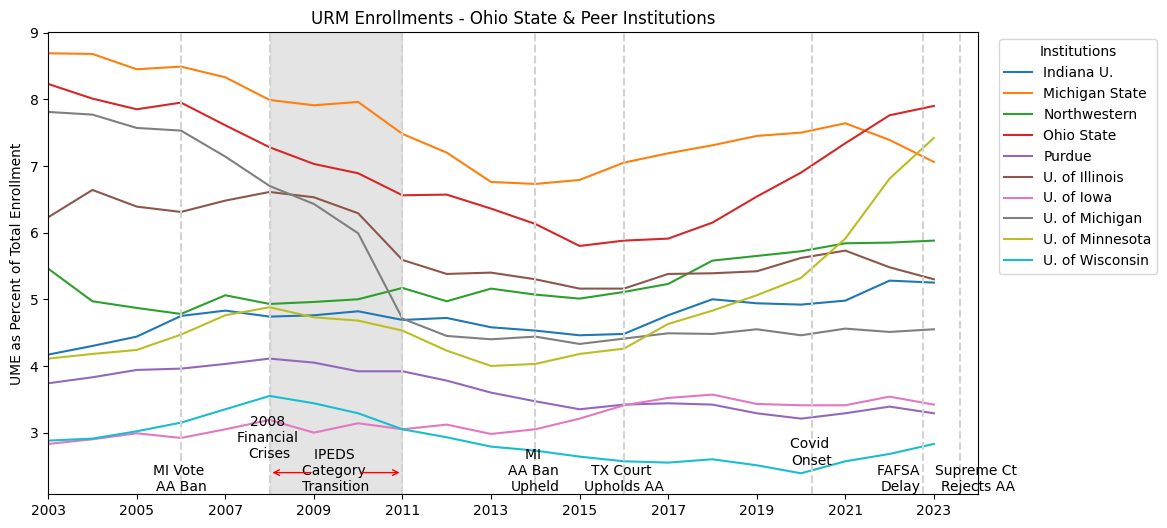

In [16]:
#plot UME enrollment by year for each institution
df_Big_Ten.plot(kind = 'line', figsize=(12,6))

#set x limits & tick marks
plt.xlim(2003, 2024)
plt.xticks(range(2003, 2024, 2))

#add line to mark onset of Covid pandemic
plt.axvline(x=2020.25, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2020.25, plt.ylim()[0] + 0.4, 'Covid \nOnset', color='black',
         ha='center', va='bottom', fontsize=10)

#add lines and shading to mark IPEDS definition transition
#Pre-2008 "Asian/Native Hawaiian/Pacific Islander" was one category. Post 2010, 'Asian' was a separate category, 2 or more races category added
plt.axvline(x=2008, color = 'lightgray', linestyle='--')
plt.axvline(x=2011, color = 'lightgray', linestyle='--')
#add shading
plt.axvspan(2008, 2011, alpha=0.6, color='lightgray')
#add label
plt.text(2009.5, plt.ylim()[0], 'IPEDS \nCategory \nTransition', color='black',
         ha='center', va='bottom', fontsize=10)
#add arrows
plt.annotate('', xy=(2008, 2.4), xytext = (2009, 2.4),
             arrowprops=dict(arrowstyle='->', color = 'red', lw = 1))
plt.annotate('', xy=(2011, 2.4), xytext = (2010, 2.4),
             arrowprops=dict(arrowstyle='->', color = 'red', lw = 1))

#add line to mark court decision upholding MI voter-approved affirmative action ban
plt.axvline(x=2014, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2014, plt.ylim()[0], 'MI \nAA Ban \nUpheld', color='black',
         ha='center', va='bottom', fontsize=10)

#Add line to mark Michigan voters' approval of affirmative action ban
plt.axvline(x=2006, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2006, plt.ylim()[0], 'MI Vote \nAA Ban', color='black',
         ha='center', va='bottom', fontsize=10)

#Add line to note Texas court uphoding race concious admissions policies
plt.axvline(x=2016, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2016, plt.ylim()[0], 'TX Court \nUpholds AA', color='black',
         ha='center', va='bottom', fontsize=10)

#Add line to note US Supreme Court rejection AA
plt.axvline(x=2023.6, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2024, plt.ylim()[0], 'Supreme Ct \nRejects AA', color='black',
         ha='center', va='bottom', fontsize=10)

#Add line to note 2008 Financial Crises
plt.axvline(x=2008, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2008, plt.ylim()[0] + 0.5, '2008 \nFinancial \nCrises', color='black',
         ha='center', va='bottom', fontsize=10)

#Add line to note FAFSA rollout (delayed, glitches)
plt.axvline(x=2022.75, color = 'lightgray', linestyle='--')
#add label to line
plt.text(2022.25, plt.ylim()[0], 'FAFSA \nDelay', color='black',
         ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('URM Enrollments - Ohio State & Peer Institutions')
plt.xlabel('')
plt.ylabel('UME as Percent of Total Enrollment')

# Add legend
plt.legend(title='Institutions', loc = 'upper right', bbox_to_anchor=(1.2,1))

#save plot as jpg
plt.savefig('plot.jpg', bbox_inches='tight')

#download the plot
from google.colab import files
files.download('plot.jpg')

# Display the plot
plt.show()